In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set plotting style
sns.set_style('whitegrid')


C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Load Lending Club CSV (adjust path)
df = pd.read_csv("loan.csv", low_memory=False)

# Preview the dataset
print(df.head())
print(df.info())
print("Number of rows and columns:", df.shape)


   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0   

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [5]:
# Check all column names
print(df.columns.tolist())


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_i

In [6]:
df['int_rate'].dtypes

dtype('float64')

In [7]:
df.isna().sum()

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64

In [8]:
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\AppData\Local\Temp/ipyker

C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/1377465448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [9]:
# Define default as 'Charged Off' or 'Default'
df['default_flag'] = df['loan_status'].apply(
    lambda x: 1 if x in ['Charged Off', 'Default'] else 0
)

# Check default distribution
print(df['default_flag'].value_counts(normalize=True))

# Visualize default distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='default_flag', data=df)
plt.title('Distribution of Default vs Fully Paid Loans')
plt.xticks([0, 1], ['Fully Paid', 'Default'])

# Save plot as PNG
plt.savefig('default_distribution.png', bbox_inches='tight')
plt.close()


default_flag
0    0.884244
1    0.115756
Name: proportion, dtype: float64


In [10]:
# Create SQLite database
conn = sqlite3.connect('lending_club.db')
df.to_sql('loans', conn, if_exists='replace', index=False)

# Example: Default rate by loan grade
query = """
SELECT grade, 
       COUNT(*) AS num_loans, 
       AVG(default_flag) AS default_rate
FROM loans
GROUP BY grade
ORDER BY grade
"""
grade_summary = pd.read_sql(query, conn)
print(grade_summary)

# Visualize default rate by grade
plt.figure(figsize=(8, 5))
sns.barplot(x='grade', y='default_rate', data=grade_summary)
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')

# Save plot as PNG
plt.savefig('default_rate_by_grade.png', bbox_inches='tight')
plt.close()



  grade  num_loans  default_rate
0     A     433027      0.031795
1     B     663557      0.076984
2     C     650053      0.128099
3     D     324424      0.183245
4     E     135639      0.260751
5     F      41800      0.341268
6     G      12168      0.368343


In [11]:
# Default rate by loan term
term_default = df.groupby('term')['default_flag'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='term', y='default_flag', data=term_default)
plt.title('Default Rate by Loan Term')
plt.ylabel('Default Rate')

# Save plot as PNG
plt.savefig('default_rate_by_loan_term.png', bbox_inches='tight')
plt.close()


In [12]:
# Default rate by home ownership
home_default = df.groupby('home_ownership')['default_flag'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='home_ownership', y='default_flag', data=home_default)
plt.title('Default Rate by Home Ownership')
plt.ylabel('Default Rate')
plt.xticks(rotation=30)

# Save plot as PNG
plt.savefig('default_rate_by_home_ownership.png', bbox_inches='tight')
plt.close()


In [13]:
# Default rate by loan purpose
purpose_default = (
    df.groupby('purpose')['default_flag']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 5))
sns.barplot(x=purpose_default.index, y=purpose_default.values)
plt.xticks(rotation=45, ha='right')
plt.title('Default Rate by Loan Purpose')
plt.ylabel('Default Rate')

# Save plot as PNG
plt.savefig('default_rate_by_loan_purpose.png', bbox_inches='tight')
plt.close()


In [14]:
# Default rate by state
state_default = (
    df.groupby('addr_state')['default_flag']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 5))
sns.barplot(x=state_default.index, y=state_default.values)
plt.xticks(rotation=90)
plt.title('Default Rate by State')
plt.ylabel('Default Rate')

# Save plot as PNG
plt.savefig('default_rate_by_state.png', bbox_inches='tight')
plt.close()


C:\Users\Dell\AppData\Local\Temp/ipykernel_10948/2690417233.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['emp_length'].fillna(df_model['emp_length'].median(), inplace=True)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    399797
           1       0.26      0.00      0.00     52337

    accuracy                           0.88    452134
   macro avg       0.57      0.50      0.47    452134
weighted avg       0.81      0.88      0.83    452134

ROC-AUC: 0.6832243725060054


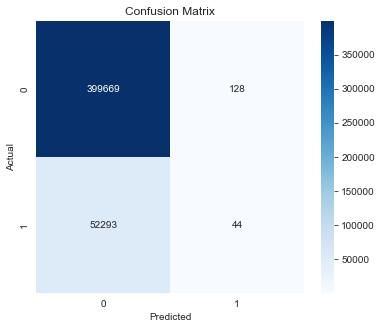

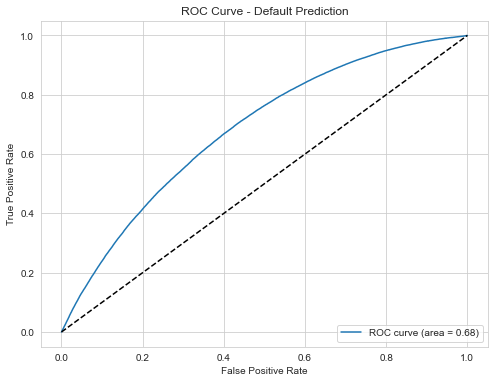

In [15]:
# Select features
features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc', 'emp_length']
df_model = df[features + ['default_flag']].copy()

# Convert empLength to numeric
def emp_to_num(emp):
    if emp == '10+ years': return 10
    elif emp == '< 1 year': return 0
    elif pd.isnull(emp): return np.nan
    else: return int(emp.split()[0])

df_model['emp_length'] = df_model['emp_length'].apply(emp_to_num)
df_model['emp_length'].fillna(df_model['emp_length'].median(), inplace=True)

# Split data
X = df_model[features]
y = df_model['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:,1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Default Prediction')
plt.legend(loc='lower right')
plt.show()


In [16]:
# Average interest rate by grade
grade_int = df.groupby('grade')['int_rate'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='grade', y='int_rate', data=grade_int)
plt.title('Average Interest Rate by Grade')
plt.ylabel('Interest Rate (%)')

# Save plot
plt.savefig('avg_interest_rate_by_grade.png', bbox_inches='tight')
plt.close()




In [17]:
# Distribution of loan amounts by default status
plt.figure(figsize=(10, 5))
sns.boxplot(x='default_flag', y='loan_amnt', data=df)
plt.title('Loan Amount Distribution: Default vs Fully Paid')
plt.xticks([0, 1], ['Fully Paid', 'Default'])

# Save plot
plt.savefig('loan_amount_distribution_by_default.png', bbox_inches='tight')
plt.close()
